# **Wide Form Time Series**

_John Andrew Dixon_

---

##### **Imports**

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd

##### **Data Load**

In [52]:
# URL to data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
# Load the data
df = pd.read_csv(url)
# Verify it loaded
display(df.head())
# View column count
display(len(df.columns))
# View row count
len(df.index)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


281

22467

---

## **Tasks**

### **Part-1**

#### _Filter the 4 largest cities into a new dataframe._

In [53]:
largest_cities_df = df[0:4].drop(columns=["RegionType"])
largest_cities_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,108878.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,167368.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


#### _Melt the data to long-form and prepare it for time series analysis._

In [54]:
# Melt the DataFrame
melted_df = pd.melt(largest_cities_df, 
                    id_vars = largest_cities_df.columns[0:7],
                    var_name= "Date",
                    value_name = "HouseValue")
melted_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,Date,HouseValue
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [55]:
# Convert date column to datetime
melted_df["DateTime"] = pd.to_datetime(melted_df["Date"])
melted_df.drop(columns="Date", inplace=True)
melted_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,HouseValue,DateTime
0,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,2000-01-31
1,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,2000-01-31
2,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,2000-01-31
3,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,2000-01-31
4,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0,2000-02-29
...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0,2022-08-31
1088,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0,2022-09-30
1089,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0,2022-09-30
1090,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,272639.0,2022-09-30


In [56]:
# Set the DateTime column as the DataFrame's index
melted_df.set_index('DateTime', inplace=True)
melted_df

,RegionID,SizeRank,RegionName,StateName,State,Metro,CountyName,HouseValue
DateTime,,,,,,,,
2000-01-31,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


#### _Resample the dataframe as monthly frequency, grouped by City._

In [73]:
# Resample by month and group by city
final_df = melted_df.groupby("RegionName").resample("M").sum(numeric_only=True)
final_df.sample(10)

RegionID  SizeRank  HouseValue
RegionName  DateTime                                  
Chicago     2012-03-31     17426         3    182673.0
New York    2006-09-30      6181         0    553075.0
            2008-05-31      6181         0    537685.0
Houston     2020-03-31     39051         2    195870.0
New York    2011-12-31      6181         0    466572.0
Houston     2016-06-30     39051         2    168470.0
Chicago     2014-06-30     17426         3    211624.0
Los Angeles 2014-02-28     12447         1    529072.0
            2011-03-31     12447         1    422018.0
Houston     2007-10-31     39051         2    138449.0

### **Part-2**

#### _Plot the home values for all 4 cities._

In [71]:
# Unstack the final DataFrame for plotting
unstacked_df = final_df.drop(columns=["RegionID", "SizeRank"]).unstack(level = 0)
unstacked_df

HouseValue                                
RegionName    Chicago   Houston Los Angeles  New York
DateTime                                             
2000-01-31   166139.0  109068.0    234181.0  253690.0
2000-02-29   166536.0  109079.0    234401.0  255517.0
2000-03-31   167368.0  108878.0    235513.0  257207.0
2000-04-30   168826.0  108881.0    237589.0  260310.0
2000-05-31   170499.0  108834.0    240113.0  263204.0
...               ...       ...         ...       ...
2022-05-31   312487.0  265558.0    990391.0  768797.0
2022-06-30   314663.0  268901.0    992337.0  773944.0
2022-07-31   315910.0  271059.0    992630.0  777692.0
2022-08-31   315587.0  272400.0    978196.0  779960.0
2022-09-30   315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [93]:
(unstacked_df["HouseValue"] == 0).sum()

RegionName
Chicago        3
Houston        1
Los Angeles    0
New York       1
dtype: int64

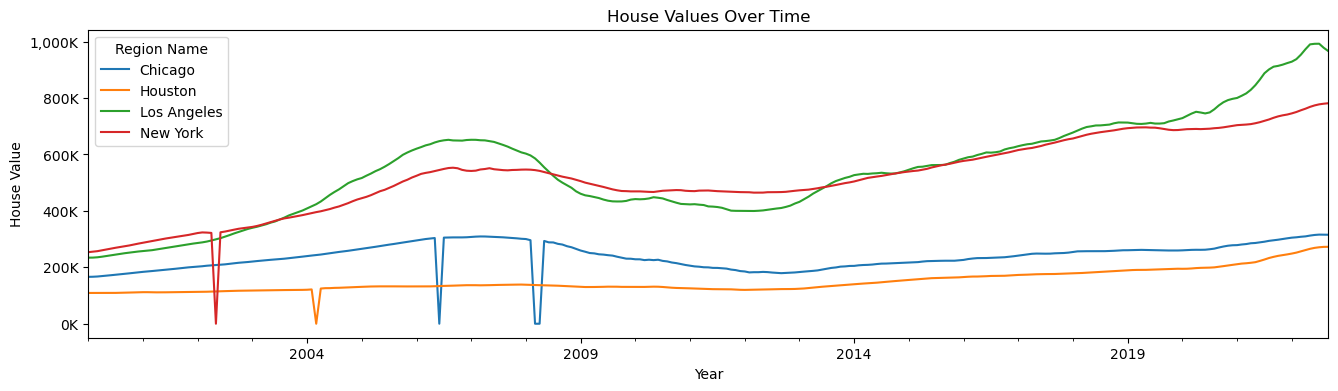

In [87]:
# Plot the graph
ax = unstacked_df["HouseValue"].plot(figsize=(16, 4))

# Set title and axis labels
ax.set_title("House Values Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("House Value")

# Format y-axis ticks
fmt_thousands = mticks.FuncFormatter(lambda x, pos: f"{x/1000:,.0f}K")
ax.yaxis.set_major_formatter(fmt_thousands)
plt.legend(title="Region Name");

#### _Answer the following 2 questions using pandas:_

##### Which City had the highest Typical Home Value at the end of 2008? Which had the least?

##### How much did the home values change from November 2008 to December 2008 (in dollars)?